# **Importing the Dataset and necessary libraries**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parulpandey/emotion-dataset")

print("Path to dataset files:", path)

100%|██████████| 715k/715k [00:00<00:00, 95.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/parulpandey/emotion-dataset/versions/1


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import pickle


In [3]:
train_df = pd.read_csv(os.path.join(path,"training.csv"))
test_df = pd.read_csv(os.path.join(path, "test.csv"))
val_df = pd.read_csv(os.path.join(path,"validation.csv"))

# Preprocessing and Visualizing the Dataset

In [4]:
train_df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [5]:
train_df.isnull().sum()

#Shows that there is no null values in the training dataset

,0
text,0
label,0


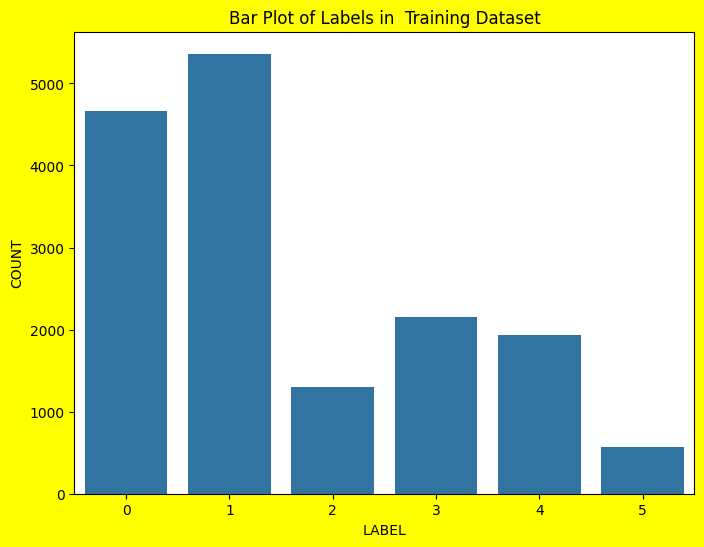

In [6]:
#Checking the  bar plot of Label
plt.figure(figsize=(8,6), facecolor='yellow')
plt.title("Bar Plot of Labels in  Training Dataset")
sns.countplot(data=train_df , x='label')
plt.xlabel('LABEL')
plt.ylabel('COUNT')
plt.show()

 0 : SAD

 1 : JOY

 2: LOVE

 3: ANGER

 4: FEAR







In [7]:
# 5th label is too low to be used. So dropping the label

train_df=train_df[train_df['label']!=5]
test_df=test_df[test_df['label']!=5]
val_df=val_df[val_df['label']!=5]
#Hypertuned and deleted so merging

full_df = pd.concat([train_df,val_df],ignore_index=True)
full_df['label'].value_counts().reset_index()

,label,count
0,1,6066
1,0,5216
2,3,2434
3,4,2149
4,2,1482


# **TfidfVectorizer + Logistic Regression**

In [8]:
y_train = full_df['label']
X_train=full_df['text']
X_test= test_df['text']
y_test = test_df['label']

In [9]:
pipeline = Pipeline(
    [
        ('tfidf',TfidfVectorizer(max_features=3000,
                            stop_words='english',
                            lowercase=True,
                            ngram_range=(1,2),
                            min_df= 3,
                            max_df=0.8)),
        ('svm',LinearSVC(C=1.0,
    penalty='l2',
    loss='squared_hinge',
    class_weight='balanced',
    dual=True,
    max_iter=1000))
    ]
)
pipeline.fit(X_train,y_train)



Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=3000, min_df=3,
                                 ngram_range=(1, 2), stop_words='english')),
                ('svm', LinearSVC(class_weight='balanced', dual=True))])

In [10]:
y_pred= pipeline.predict(X_test)

print(accuracy_score(y_test,y_pred)*100,"%")
print(classification_report(y_test,y_pred))

91.67528438469493 %
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       581
           1       0.95      0.92      0.94       695
           2       0.74      0.88      0.80       159
           3       0.88      0.90      0.89       275
           4       0.92      0.93      0.92       224

    accuracy                           0.92      1934
   macro avg       0.89      0.91      0.90      1934
weighted avg       0.92      0.92      0.92      1934



# Pickle Upload


In [12]:
with open('twitter-model.pkl','wb') as f:
  pickle.dump(pipeline,f)
